# Implement model for degradation / restoration of image

## Image Degradation ( Adding Noise and Blurring)

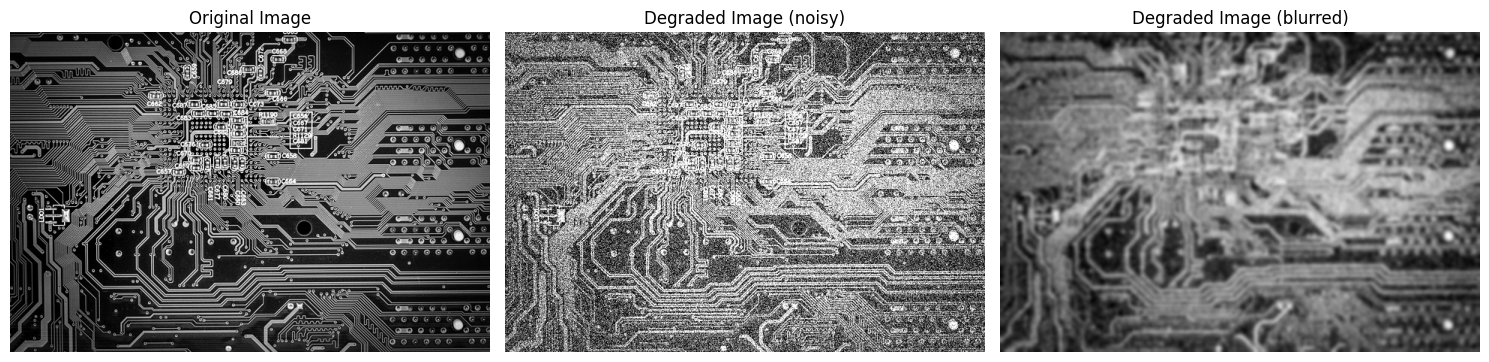

In [66]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load a sample image
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Simulate degradation: Adding Gaussian noise
def add_gaussian_noise(image, mean=0, std=25):
    noisy_image = image + np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

noisy_image=add_gaussian_noise(image,60,60)

blurred_image = cv2.GaussianBlur(noisy_image, (15, 15), 0)

plt.figure(figsize=(15,15))
# Display the degraded images
plt.subplot(1, 3, 1), plt.imshow(image,cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 3, 2), plt.imshow(noisy_image,cmap='gray')
plt.title('Degraded Image (noisy)'), plt.axis('off')

plt.subplot(1, 3, 3), plt.imshow(blurred_image,cmap='gray')
plt.title('Degraded Image (blurred)'), plt.axis('off')
plt.tight_layout()
plt.show()


## Image Restoration Using Spatial Filters

### Mean Filter

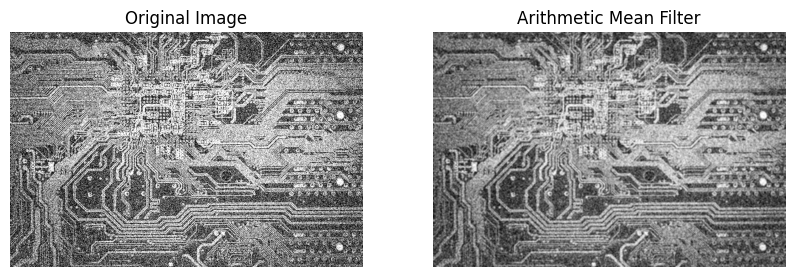

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image=noisy_image

def arithmetic_mean_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    return cv2.filter2D(image, -1, kernel)

# Apply arithmetic mean filter
arithmetic_mean_filtered = arithmetic_mean_filter(image, kernel_size=3)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(arithmetic_mean_filtered, cmap='gray')
plt.title("Arithmetic Mean Filter"), plt.axis('off')
plt.show()


### Geometric mean filter

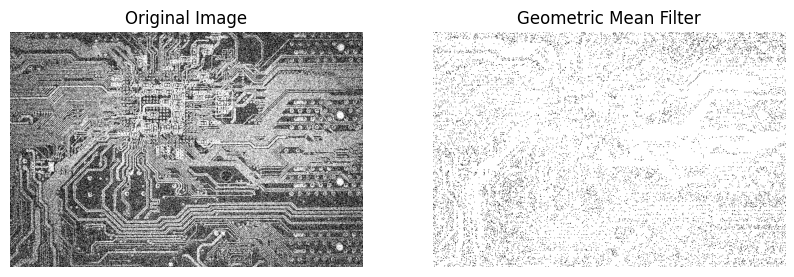

In [68]:
def geometric_mean_filter(image, kernel_size):
    image_float32 = image.astype(np.float32)
    geometric_mean_filtered = cv2.pow(image_float32, 1.0 / (kernel_size ** 2))
    geometric_mean_filtered = geometric_mean_filtered.astype(np.uint8)
    return geometric_mean_filtered

# Apply geometric mean filter
geometric_mean_filtered = geometric_mean_filter(image, kernel_size=3)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(geometric_mean_filtered, cmap='gray')
plt.title("Geometric Mean Filter"), plt.axis('off')
plt.show()


### Harmonic Mean Filter

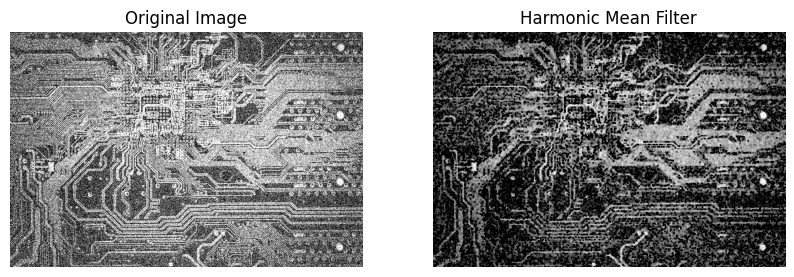

In [69]:
def harmonic_mean_filter(image, kernel_size):
    inverse_image = 1.0 / (image + 1e-6)
    kernel = np.ones((kernel_size, kernel_size))
    return kernel_size ** 2 / cv2.filter2D(inverse_image, -1, kernel)

# Apply harmonic mean filter
harmonic_mean_filtered = harmonic_mean_filter(image, kernel_size=3)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(harmonic_mean_filtered, cmap='gray')
plt.title("Harmonic Mean Filter"), plt.axis('off')
plt.show()


### Contraharmonic Mean Filter

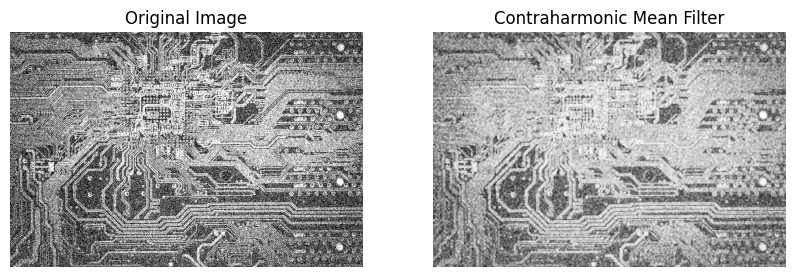

In [70]:
def contra_harmonic_mean_filter(image, kernel_size, q):
    image_power_q = np.power(image, q)
    image_power_q_plus_1 = np.power(image, q + 1)
    kernel = np.ones((kernel_size, kernel_size))

    numerator = cv2.filter2D(image_power_q_plus_1, -1, kernel)
    denominator = cv2.filter2D(image_power_q, -1, kernel)

    return numerator / (denominator + 1e-6)

# Apply contra harmonic mean filter with q=1.5 (positive for pepper noise, negative for salt noise)
contra_harmonic_mean_filtered = contra_harmonic_mean_filter(image, kernel_size=3, q=1.5)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(contra_harmonic_mean_filtered, cmap='gray')
plt.title("Contraharmonic Mean Filter"), plt.axis('off')
plt.show()


## Order Statistic Filters

### Median Filter

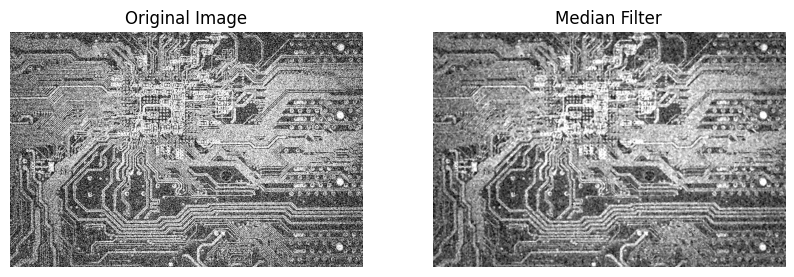

In [71]:
def median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

# Apply median filter
median_filtered = median_filter(image, kernel_size=3)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter"), plt.axis('off')
plt.show()


### Min Max Filter

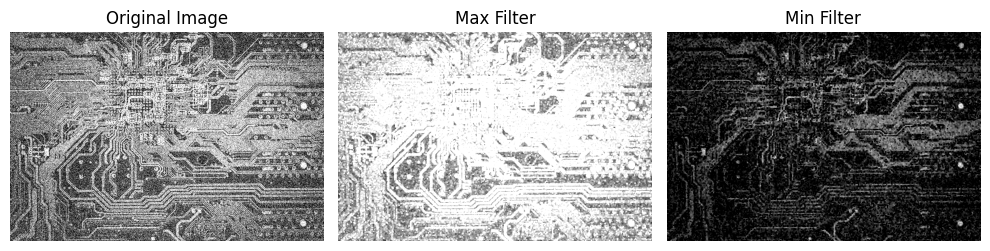

In [72]:
def max_filter(image, kernel_size):
    return cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

def min_filter(image, kernel_size):
    return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

# Apply max and min filters
max_filtered = max_filter(image, kernel_size=3)
min_filtered = min_filter(image, kernel_size=3)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(max_filtered, cmap='gray')
plt.title("Max Filter"), plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(min_filtered, cmap='gray')
plt.title("Min Filter"), plt.axis('off')

plt.tight_layout()
plt.show()


### Midpoint Filter

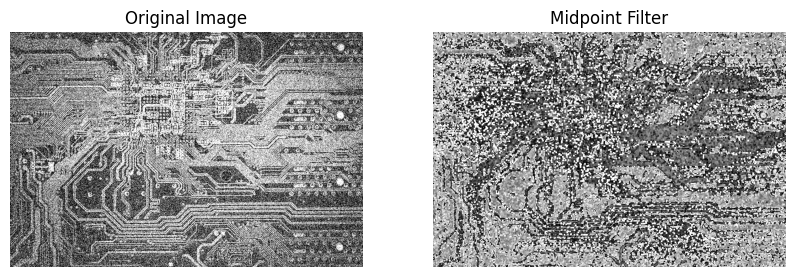

In [73]:
def midpoint_filter(image, kernel_size):
    max_filtered = max_filter(image, kernel_size)
    min_filtered = min_filter(image, kernel_size)
    return (max_filtered + min_filtered) / 2

# Apply midpoint filter
midpoint_filtered = midpoint_filter(image, kernel_size=3)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(midpoint_filtered, cmap='gray')
plt.title("Midpoint Filter"), plt.axis('off')
plt.show()

### Aplha Trimmed Mean Filter

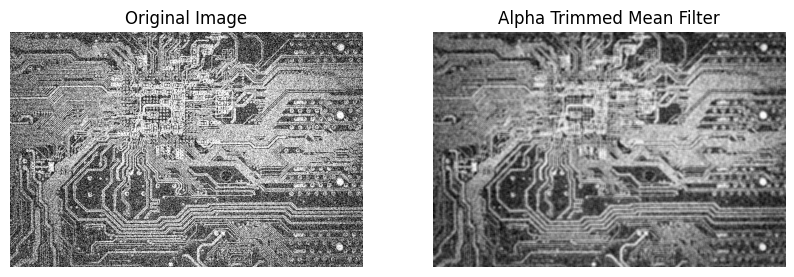

In [74]:
def alpha_trimmed_mean_filter(image, kernel_size, d):
    padding = kernel_size // 2
    image_padded = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REPLICATE)
    output_image = np.zeros_like(image, dtype=np.float32)

    for i in range(padding, image.shape[0] + padding):
        for j in range(padding, image.shape[1] + padding):
            neighbors = image_padded[i - padding:i + padding + 1, j - padding:j + padding + 1].flatten()
            neighbors.sort()
            trimmed_neighbors = neighbors[d//2:-(d//2)]
            output_image[i - padding, j - padding] = np.mean(trimmed_neighbors)

    return output_image.astype(np.uint8)

# Apply alpha trimmed mean filter with d=4 (5x5 kernel with d=4)
alpha_trimmed_mean_filtered = alpha_trimmed_mean_filter(image, kernel_size=5, d=4)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(alpha_trimmed_mean_filtered, cmap='gray')
plt.title("Alpha Trimmed Mean Filter"), plt.axis('off')
plt.show()

## Adaptive Local Noise Reduction Filter

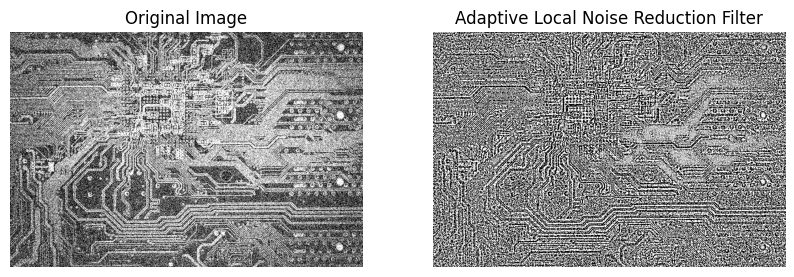

In [75]:
def adaptive_local_noise_reduction(image, window_size, k):
    padding = window_size // 2
    image_padded = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REFLECT)

    output_image = np.zeros_like(image, dtype=np.float32)

    for i in range(padding, image.shape[0] + padding):
        for j in range(padding, image.shape[1] + padding):
            window = image_padded[i - padding:i + padding + 1, j - padding:j + padding + 1]
            local_mean = np.mean(window)
            local_variance = np.var(window)
            output_image[i - padding, j - padding] = max(0, min(255, image[i - padding, j - padding] - k * (local_variance / local_mean) * (image[i - padding, j - padding] - local_mean)))

    return output_image.astype(np.uint8)

# Apply adaptive local noise reduction filter with window size = 7 and k = 0.2
adaptive_noise_reduced =adaptive_local_noise_reduction(image, window_size=7, k=0.2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(adaptive_noise_reduced, cmap='gray')
plt.title("Adaptive Local Noise Reduction Filter"), plt.axis('off')
plt.show()

## Adaptive Median Filter

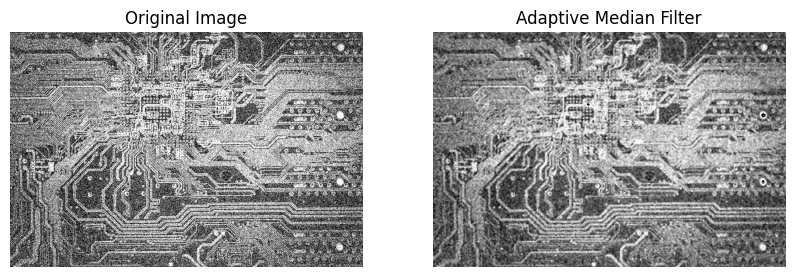

In [76]:
def adaptive_median_filter(image, max_window_size):
    def apply_median_filter(window):
        return np.median(window)

    padded_image = cv2.copyMakeBorder(image, max_window_size // 2, max_window_size // 2, max_window_size // 2, max_window_size // 2, cv2.BORDER_REFLECT)
    output_image = np.zeros_like(image)

    for i in range(max_window_size // 2, image.shape[0] + max_window_size // 2):
        for j in range(max_window_size // 2, image.shape[1] + max_window_size // 2):
            window_size = 3
            while window_size <= max_window_size:
                window = padded_image[i - window_size // 2:i + window_size // 2 + 1, j - window_size // 2:j + window_size // 2 + 1]
                window_median = apply_median_filter(window)
                window_min = np.min(window)
                window_max = np.max(window)

                if window_min < window_median < window_max:
                    output_image[i - max_window_size // 2, j - max_window_size // 2] = window_median
                    break
                else:
                    window_size += 2

    return output_image

# Apply adaptive median filter with maximum window size = 11
adaptive_median_filtered = adaptive_median_filter(image, max_window_size=11)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(adaptive_median_filtered, cmap='gray')
plt.title("Adaptive Median Filter"), plt.axis('off')
plt.show()


## Periodic Noise Reduction using Frequency Domain Filtering (Bandpass Filter)

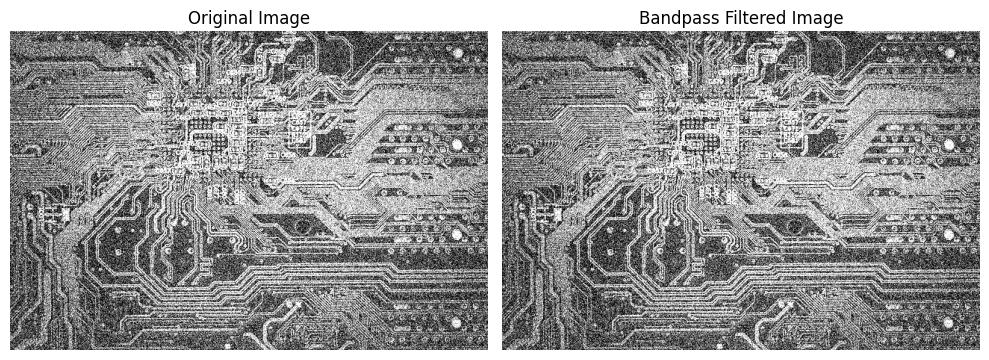

In [77]:
def bandpass_filter(image, low_pass_kernel_size):
    # Ensure the kernel size is odd
    low_pass_kernel_size = low_pass_kernel_size + 1 if low_pass_kernel_size % 2 == 0 else low_pass_kernel_size

    # Apply low-pass filter
    low_pass_filtered = cv2.GaussianBlur(image.astype(np.float32), (low_pass_kernel_size, low_pass_kernel_size), 0)

    # Compute high-pass filter
    high_pass_filtered = image.astype(np.float32) - low_pass_filtered

    # Add low-pass and high-pass filtered images to get the final result
    result_image = low_pass_filtered + high_pass_filtered

    # Clip values to [0, 255]
    result_image = np.clip(result_image, 0, 255)

    return result_image.astype(np.uint8)

# Apply bandpass filter with low-pass kernel size = 21 (an odd value)
bandpass_filtered = bandpass_filter(image, low_pass_kernel_size=21)

# Display the original and filtered images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image'), plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(bandpass_filtered, cmap='gray')
plt.title("Bandpass Filtered Image"), plt.axis('off')

plt.tight_layout()
plt.show()
